In [1]:
# qualify on member status active only:

In [2]:
# import numpy and pandas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import metrics

# used for dates
import datetime
from datetime import datetime, date

# Set some pandas options controlling output format
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 90)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

### upload .png files

In [3]:
br = '\n'
# upload files

df = np.load('data/df.npy', allow_pickle = True)
df_features = np.load('data/features.npy')

In [4]:
print(df_features)

['Household_Key' 'Individual_Key' 'City' 'State_Grouped' 'ZIP5' 'ZIP9'
 'FSV_CMSI_Flag' 'FSV_Credit_Card_Flag' 'FSV_Deposit_Program_Flag'
 'FSV_Home_Equity_Flag' 'FSV_ID_Theft_Flag' 'FSV_Mortgage_Flag'
 'INS_Client_Flag' 'TRV_Globalware_Flag' 'Number_of_Children'
 'Responded_to_Catalog' 'Race' 'Length_Of_Residence' 'Mail_Responder'
 'Home_Owner' 'Income' 'Date_Of_Birth' 'Age' 'Children' 'Education'
 'Dwelling_Type' 'Credit_Ranges' 'Language' 'Gender' 'Branch_Name'
 'County' 'Join_AAA_Date' 'Member_Phone_Type' 'Member_Status'
 'Member_Tenure_Years' 'Member_Type' 'Reinstate_Date' 'Renew_Method' 'ZIP'
 'Mosaic_Household' 'Mosaic_Global_Household' 'kcl_B_IND_MosaicsGrouping'
 'New_Mover_Flag' 'Occupation_Code' 'Occupation_Group'
 'Right_Dwelling_Type' 'Move_Distance' 'Occupant_Type' 'Membership_Level'
 'Roadside_Service' '_memeber_count' '_service_cnt' '_total_cost'
 '_total_products' '_ERS_ENT_Count_Year_1' '_ERS_ENT_Count_Year_2'
 '_ERS_ENT_Count_Year_3' '_ERS_Member_Cost_Year_1'
 '_ERS_

In [5]:
dfv = pd.DataFrame(df, columns=df_features)
dfv.head()

  Household_Key Individual_Key      City State_Grouped           ...            \
0           875         717785  CRANSTON            RI           ...             
1           969          19943  JOHNSTON            RI           ...             
2          8718         199385  CRANSTON            RI           ...             
3         11524       52285851  JOHNSTON            RI           ...             
4         13422      170834500  COVENTRY            RI           ...             

  _ERS_ENT_Count_Year_3 _ERS_Member_Cost_Year_1 _ERS_Member_Cost_Year_2  \
0                     9                  2118.6                  2118.6   
1                    27                       0                  940.85   
2                     0                       0                       0   
3                     1                       0                       0   
4                     0                   58.85                       0   

  _ERS_Member_Cost_Year_3  
0                 3197.57  


In [6]:
dfv['Member_Status'].unique()
df_temp = dfv[dfv['Member_Status'] == 'ACTIVE'].copy()

In [7]:
# select the columns from above data
li =  ['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years', 
       'New_Mover_Flag', 'Credit_Ranges',
       'Children','Education', 'Dwelling_Type', '_total_products']
li


['Home_Owner',
 'Age',
 'Length_Of_Residence',
 'Member_Tenure_Years',
 'New_Mover_Flag',
 'Credit_Ranges',
 'Children',
 'Education',
 'Dwelling_Type',
 '_total_products']

In [8]:
df1= df_temp[li].copy()
df2 = df1.dropna()
subdf = df2.drop_duplicates()
print("subset df shape:", subdf.shape, " orignal df shape:", df.shape )


subset df shape: (1971, 10)  orignal df shape: (3219, 60)


In [9]:
# percentile list 
perc =[.20, .40, .60, .80] 
# list of dtypes to include 
include =['object', 'float', 'int'] 
desc = subdf.describe(percentiles = perc, include = include) 
print(desc.iloc[:,0:5])
print("--"*50)
print(desc.iloc[:,6:11])


        Home_Owner   Age  Length_Of_Residence  Member_Tenure_Years New_Mover_Flag
count         1971  1971                 1971                 1971           1971
unique           4    68                   32                   77              2
top     Home.Owner    75                   15                   47              N
freq          1903   226                 1039                  355           1917
----------------------------------------------------------------------------------------------------
       Children     Education Dwelling_Type  _total_products
count      1971          1971          1971             1971
unique        2             5             4                7
top          No  Some.College          SFDU                0
freq       1040           579          1700             1213


# X,y

In [10]:
def yes_or_no(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return np.NaN  

In [11]:
# data_X
select_col = li[:-1]
print(select_col)
print("--"*50)
y_col = li[-1]
print("target y:", y_col)

#split the dataset to X & y:
X = subdf.drop([y_col], axis=1).values
fix_y = subdf[y_col].apply(yes_or_no)
#fix_y = subdf[y_col].copy()
print("max y:", fix_y.max())
y = fix_y.values
print("y is", y)

# data_X contains only X
data_X = subdf[select_col].copy()
print(data_X.head())

['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years', 'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type']
----------------------------------------------------------------------------------------------------
target y: _total_products
max y: 1
y is [0 1 1 ... 0 0 1]
   Home_Owner Age Length_Of_Residence Member_Tenure_Years      ...      Credit_Ranges  \
1  Home.Owner  77                  15                  54      ...               800+   
2  Home.Owner  68                  15                  13      ...               800+   
3  Home.Owner  76                  15                  44      ...            700-749   
4  Home.Owner  70                  15                  49      ...            650-699   
6  Home.Owner  73                  15                  14      ...            750-799   

  Children         Education Dwelling_Type  
1       No       High.School          SFDU  
2       No      Some.College          SFDU  
3       No       High.Scho

### Machine Learning algorithms only operate on numberical data

In [12]:
subdf[select_col].iloc[50]

Home_Owner               Home.Owner
Age                              70
Length_Of_Residence              13
Member_Tenure_Years              47
New_Mover_Flag                    N
Credit_Ranges               700-749
Children                        Yes
Education              Some.College
Dwelling_Type                  SFDU
Name: 86, dtype: object

### Encoding

In [13]:
# columns numbers only 
data_X['Member_Tenure_Years'].astype(int)
cat_vars = ['Home_Owner', 'Children', 'Education', 'Dwelling_Type', 'Credit_Ranges', 'New_Mover_Flag']
print("selected columns:", cat_vars)

data_new = pd.get_dummies(data_X, columns=cat_vars)
data_new.columns
#print("features: \n", list(data_new))

selected columns: ['Home_Owner', 'Children', 'Education', 'Dwelling_Type', 'Credit_Ranges', 'New_Mover_Flag']


Index(['Age', 'Length_Of_Residence', 'Member_Tenure_Years', 'Home_Owner_Home.Owner',
       'Home_Owner_Probable.Home.Owner', 'Home_Owner_Probable.Renter',
       'Home_Owner_Renter', 'Children_No', 'Children_Yes', 'Education_Completed.College',
       'Education_Graduated.School', 'Education_High.School', 'Education_Some.College',
       'Education_Unknown', 'Dwelling_Type_Large.multi.family', 'Dwelling_Type_P.O.BOX',
       'Dwelling_Type_SFDU', 'Dwelling_Type_Small.or.large.multi.family',
       'Credit_Ranges_499.Less', 'Credit_Ranges_500-549', 'Credit_Ranges_550-599',
       'Credit_Ranges_600-649', 'Credit_Ranges_650-699', 'Credit_Ranges_700-749',
       'Credit_Ranges_750-799', 'Credit_Ranges_800+', 'Credit_Ranges_Unknown',
       'New_Mover_Flag_N', 'New_Mover_Flag_Y'],
      dtype='object')

In [14]:
X = data_new
y = y
print(X.shape, y.shape)
print("--"*50)
attributes = list(data_X)
print("X attributes: \n", attributes)
print("--"*50)
print(X.head())

(1971, 29) (1971,)
----------------------------------------------------------------------------------------------------
X attributes: 
 ['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years', 'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type']
----------------------------------------------------------------------------------------------------
  Age Length_Of_Residence Member_Tenure_Years  Home_Owner_Home.Owner        ...         \
1  77                  15                  54                      1        ...          
2  68                  15                  13                      1        ...          
3  76                  15                  44                      1        ...          
4  70                  15                  49                      1        ...          
6  73                  15                  14                      1        ...          

   Credit_Ranges_800+  Credit_Ranges_Unknown  New_Mover_Flag_N  New_Mover_Fla

### save encoded png files

In [15]:
file_X_init = 'data/X_init'
np.save(file_X_init, X)

file_y_init = 'data/y_init'
np.save(file_y_init, y)

In [16]:
### target y can only be bollean 

In [17]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=0,n_estimators=100)
# Train the classifier
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [18]:
print("X keys:", X.keys())

X keys: Index(['Age', 'Length_Of_Residence', 'Member_Tenure_Years', 'Home_Owner_Home.Owner',
       'Home_Owner_Probable.Home.Owner', 'Home_Owner_Probable.Renter',
       'Home_Owner_Renter', 'Children_No', 'Children_Yes', 'Education_Completed.College',
       'Education_Graduated.School', 'Education_High.School', 'Education_Some.College',
       'Education_Unknown', 'Dwelling_Type_Large.multi.family', 'Dwelling_Type_P.O.BOX',
       'Dwelling_Type_SFDU', 'Dwelling_Type_Small.or.large.multi.family',
       'Credit_Ranges_499.Less', 'Credit_Ranges_500-549', 'Credit_Ranges_550-599',
       'Credit_Ranges_600-649', 'Credit_Ranges_650-699', 'Credit_Ranges_700-749',
       'Credit_Ranges_750-799', 'Credit_Ranges_800+', 'Credit_Ranges_Unknown',
       'New_Mover_Flag_N', 'New_Mover_Flag_Y'],
      dtype='object')


In [19]:
# Print the name and gini importance of each feature
feat_labels = attributes
feat_list=[]
for feature in zip(feat_labels, rf.feature_importances_):
    feat_list.append(feature)

feat_list.sort(key=lambda x:x[1], reverse=True) #To sort by first element of the tuple   
feat_list

[('Home_Owner', 0.2994920293025511),
 ('Length_Of_Residence', 0.2827731850027846),
 ('Age', 0.14570367293570308),
 ('Education', 0.013497587471217676),
 ('Dwelling_Type', 0.012782956005391565),
 ('Member_Tenure_Years', 0.007003698180762939),
 ('Children', 0.006480587910465039),
 ('Credit_Ranges', 0.00018522523660833765),
 ('New_Mover_Flag', 0.0001577857020778565)]

In [20]:
# # write the output to data sub-directory
# root = 'data'
# df1.to_csv( root + '/' +'1.member_column_cleanup.csv',index=False)

In [21]:
rankli = []

for i in range(len(feat_list)):
    #print(feat_list[i][0])
    rankli.append(feat_list[i][0])
    
rankli

['Home_Owner',
 'Length_Of_Residence',
 'Age',
 'Education',
 'Dwelling_Type',
 'Member_Tenure_Years',
 'Children',
 'Credit_Ranges',
 'New_Mover_Flag']

### Target Value Counts:

In [22]:
d = {}

# apply yes_or_no fucntion to y   
dvc = subdf[y_col].apply(yes_or_no).value_counts()

d['no'], d['yes'] = dvc[0], dvc[1]
dvc_file = 'data/value_counts'
np.save(dvc_file, d)

# need allow_pickle=True parameter
d = np.load('data/value_counts.npy', allow_pickle=True)
print ('class counts:', d)

print(type(d))
dlist = d.tolist()

for key, value in dlist.items():
    if key == 'no':
        var_no = value
    if key == 'yes':
        var_yes = value

var_total = var_no + var_yes

print("--"*50)
print("select columns:\n", select_col)
print("target column:", y_col, "[1,0]")
print("--"*50)
print("%  No :", var_no/var_total)
print("% Yes :", var_yes/var_total)

class counts: {'no': 1213, 'yes': 758}
<class 'numpy.ndarray'>
----------------------------------------------------------------------------------------------------
select columns:
 ['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years', 'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type']
target column: _total_products [1,0]
----------------------------------------------------------------------------------------------------
%  No : 0.6154236428209031
% Yes : 0.3845763571790969


### Evaluation:

In [23]:
# subdf.head()
df_keep = subdf.copy()

C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


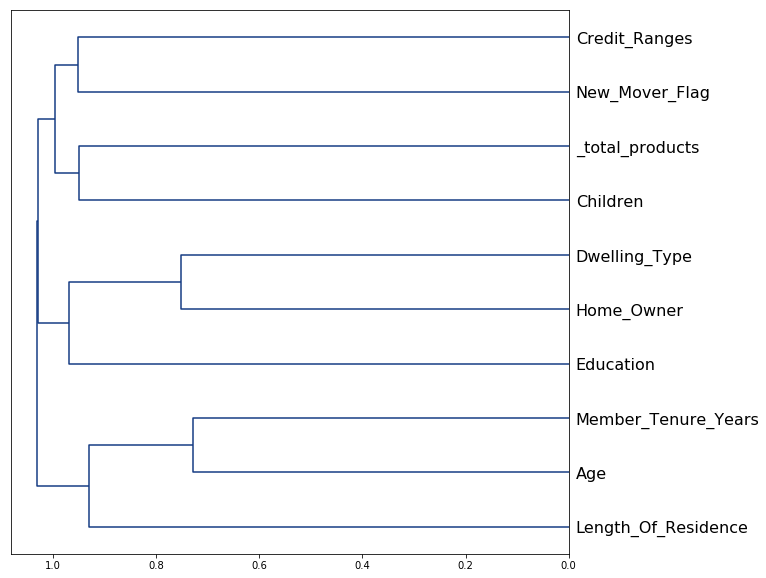

In [24]:
import scipy
from scipy.cluster import hierarchy as hc
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(10,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns,
    orientation='left', leaf_font_size=16, above_threshold_color='#143A83')
plt.show()

In [25]:
select_dim = subdf.columns

In [26]:
def find_misses(test, pred):
    return [i for i, row in enumerate(test) if row != pred[i]]

In [ ]:
#LDA are linear dimensionality reduction methods

In [27]:
def check_accur(select_dim):
    
   
    dimensions = select_dim[:-1]
#     print(dimensions)
    y = select_dim[-1]
#     print(y)

    df_imp = subdf[select_dim].copy()

    # remove duplicated rows
    imp_df = df_imp.drop_duplicates().copy()
    #print("data shape:", imp_df.shape)
    print("number of records: ", imp_df.shape[0])
    
    # X values:
    imp_X = imp_df.loc[:, imp_df.columns != select_dim[-1]]

    # y values:
    imp_y = imp_df[select_dim[-1]].copy()

    attributes = list(imp_X)

    imp_cat_vars = dimensions
    imp_data_new = pd.get_dummies(imp_X, columns=imp_cat_vars)
    imp_X = imp_data_new.copy()
    #imp_X.head()

    # Split the data into 40% test and 60% training
    imp_X_train, imp_X_test, imp_y_train, imp_y_test = train_test_split(imp_X, imp_y, test_size=0.4, random_state=0)
    # Random Forest Classifier
    crf = RandomForestClassifier(random_state=0,n_estimators=100)
    # Train the classifier
    crf.fit(imp_X_train, imp_y_train)

    # Apply The Limited Featured Classifier To The Test Data
    imp_y_pred = crf.predict(imp_X_test)
    
    print( "The Accuracy Of " , len(dimensions), " Feature Model:")
    accuracy = accuracy_score(imp_y_test, imp_y_pred)

    # StandardScaler
    X_train = imp_X_train.copy()
    X_test = imp_X_test.copy()
    y_train = imp_y_train.copy()
    y_test = imp_y_test.copy()
    
    
    lda = LDA().fit(X_train, y_train)
    print (lda, br)
    lda_name = lda.__class__.__name__
    y_pred = lda.predict(X_train)
    accuracy = metrics.accuracy_score(y_train, y_pred)
    accuracy = str(accuracy * 100) + '%'
    print (lda_name + ':')
    print ('train:', accuracy)
    y_pred_test = lda.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred_test)
    accuracy = str(round(accuracy * 100, 2)) + '%'
    print ('test: ', accuracy, br)
    print('Confusion Matrix', lda_name)
    print(metrics.confusion_matrix(y_test, lda.predict(X_test)), br)
    
    
    cm_rf = metrics.confusion_matrix(y_test, lda.predict(X_test))
    cm_rf_T = cm_rf.T
    ax = plt.axes()
    sns.heatmap(cm_rf_T, annot=True, fmt="d",cmap='gist_ncar_r', cbar=False)
    

    ax.set_title(lda_name)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()    
    
    scaler = StandardScaler().fit(X_train)
    X_train_std, X_test_std = scaler.transform(X_train),scaler.transform(X_test)
    
    # Train the classifier
    crf.fit(X_train_std, imp_y_train)

    # Apply The Limited Featured Classifier To The Test Data
    std_y_pred = crf.predict(X_test_std)
    
    std_accuracy = accuracy_score(imp_y_test, std_y_pred)
    
    #indx = find_misses(y_test, y_pred)
    
    #return accuracy, std_accuracy
    return std_accuracy

In [28]:
print(select_col)

['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years', 'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type']


Collinearity is a condition in which some of the independent variables are highly correlated. Why is this a problem? Collinearity tends to inflate the variance of at least one estimated regression coefficient,ˆβj . This can cause at least some regression coef- ficients to have the wrong sign.

selected dimensions: ['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years', 'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type']
----------------------------------------------------------------------------------------------------
number of records:  1942
The Accuracy Of  8  Feature Model:
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001) 

LinearDiscriminantAnalysis:
train: 86.18025751072962%
test:  82.24% 

Confusion Matrix LinearDiscriminantAnalysis
[[  0   0   1   0]
 [  0   3   4   2]
 [  5  23 619  23]
 [  0   7  73  17]] 



C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


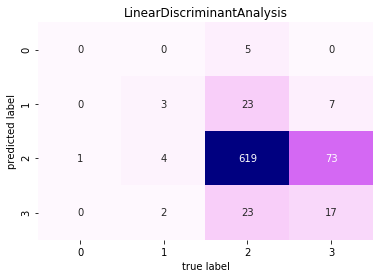

C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.


Wall time: 1.11 s


0.8661518661518661

In [29]:
select_dim = select_col.copy()
print("selected dimensions:", select_dim)
print("--"*50)

%time check_accur(select_dim)
#print("std_accuracy ", check_accur(select_dim))

### Tuning the model by removing columns

In [30]:
# Ref: confusion matrix is reversed?
# https://stackoverflow.com/questions/56078203/why-scikit-learn-confusion-matrix-is-reversed

selected dimensions: ['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years', 'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type']
----------------------------------------------------------------------------------------------------
remove dimensions: ['Member_Tenure_Years', 'Dwelling_Type']
----------------------------------------------------------------------------------------------------
number of records:  1577
The Accuracy Of  6  Feature Model:
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001) 

LinearDiscriminantAnalysis:
train: 44.08033826638478%
test:  26.62% 

Confusion Matrix LinearDiscriminantAnalysis
[[ 6  3 36 45 10]
 [ 0  0  9  7  0]
 [16  3 49 75 25]
 [19  6 46 73 26]
 [20  5 44 68 40]] 



C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


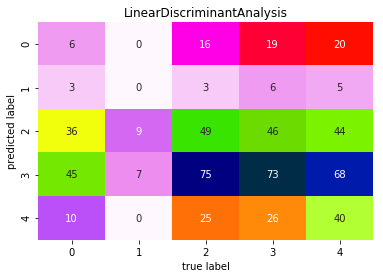

C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.


Wall time: 958 ms
number of records:  1577
The Accuracy Of  6  Feature Model:
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001) 

LinearDiscriminantAnalysis:
train: 44.08033826638478%
test:  26.62% 

Confusion Matrix LinearDiscriminantAnalysis
[[ 6  3 36 45 10]
 [ 0  0  9  7  0]
 [16  3 49 75 25]
 [19  6 46 73 26]
 [20  5 44 68 40]] 



C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


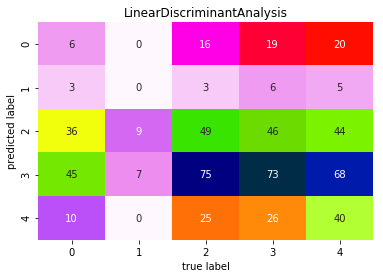

C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.


accuracy, std_accuracy  0.196513470681458


In [31]:
select_dim = select_col.copy()
print("selected dimensions:", select_dim)
print("--"*50)
#*************************************************************

# remove bottom 3 attributes:
rm = [  'Member_Tenure_Years', 'Dwelling_Type' ]


#*************************************************************
for i in range(len(rm)):
    select_dim.remove(rm[i])
print("remove dimensions:", rm)

print("--"*50)
%time check_accur(select_dim)
print("accuracy, std_accuracy ", check_accur(select_dim))

selected dimensions: ['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years', 'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type']
----------------------------------------------------------------------------------------------------
remove dimensions: ['Credit_Ranges', 'Dwelling_Type', 'Education']
----------------------------------------------------------------------------------------------------
number of records:  1554
The Accuracy Of  5  Feature Model:
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001) 

LinearDiscriminantAnalysis:
train: 67.7038626609442%
test:  51.45% 

Confusion Matrix LinearDiscriminantAnalysis
[[169 165]
 [137 151]] 



C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


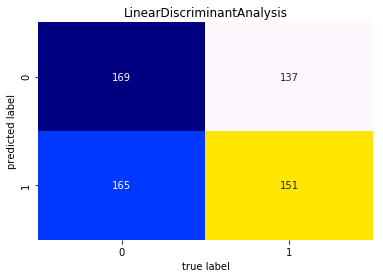

C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.


Wall time: 911 ms
number of records:  1554
The Accuracy Of  5  Feature Model:
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001) 

LinearDiscriminantAnalysis:
train: 67.7038626609442%
test:  51.45% 

Confusion Matrix LinearDiscriminantAnalysis
[[169 165]
 [137 151]] 



C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


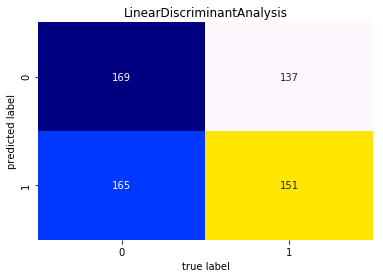

C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.


accuracy, std_accuracy  0.4758842443729904


In [32]:
select_dim = select_col.copy()
print("selected dimensions:", select_dim)
print("--"*50)
#*************************************************************

# remove bottom 3 attributes:
rm = [  'Credit_Ranges', 'Dwelling_Type', 'Education' ]


#*************************************************************
for i in range(len(rm)):
    select_dim.remove(rm[i])
print("remove dimensions:", rm)

print("--"*50)
%time check_accur(select_dim)
print("accuracy, std_accuracy ", check_accur(select_dim))

### Note: slidely impact on removing the top 3 attributes:

selected dimensions: ['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years', 'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type']
----------------------------------------------------------------------------------------------------
remove dimensions: ['Home_Owner', 'Age', 'Length_Of_Residence']
----------------------------------------------------------------------------------------------------
number of records:  1140
The Accuracy Of  5  Feature Model:
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001) 

LinearDiscriminantAnalysis:
train: 73.83040935672514%
test:  68.42% 

Confusion Matrix LinearDiscriminantAnalysis
[[  0   0   2   0]
 [  0   3   7   0]
 [ 19  16 303  25]
 [  4   5  66   6]] 



C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


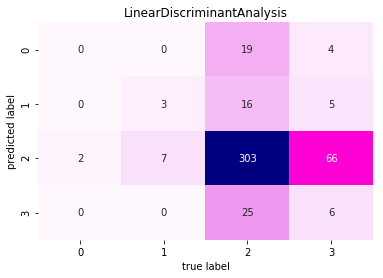

C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.


accuracy, std_accuracy  0.7302631578947368


In [33]:
select_dim = select_col.copy()
print("selected dimensions:", select_dim)
print("--"*50)
#*************************************************************

# remove top three attributes:
rm = [ 'Home_Owner', 'Age',  'Length_Of_Residence' ]

#*************************************************************
for i in range(len(rm)):
    select_dim.remove(rm[i])
print("remove dimensions:", rm)

print("--"*50)
print("accuracy, std_accuracy ", check_accur(select_dim))


selected dimensions: ['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years', 'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type']
----------------------------------------------------------------------------------------------------
remove dimensions: ['Children', 'Education', 'Credit_Ranges']
----------------------------------------------------------------------------------------------------
number of records:  1477
The Accuracy Of  5  Feature Model:
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001) 

LinearDiscriminantAnalysis:
train: 83.63431151241535%
test:  75.47% 

Confusion Matrix LinearDiscriminantAnalysis
[[  0   0   2   0]
 [  0   0   8   3]
 [  7   8 433  37]
 [  3   2  75  13]] 



C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


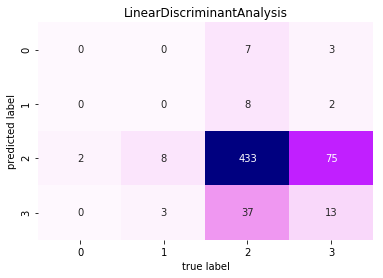

C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.


accuracy, std_accuracy  0.8037225042301185


In [34]:
select_dim = select_col.copy()
print("selected dimensions:", select_dim)
print("--"*50)
#*************************************************************

# remove top three attributes:
rm = [ 'Children', 'Education', 'Credit_Ranges' ]

#*************************************************************
for i in range(len(rm)):
    select_dim.remove(rm[i])
print("remove dimensions:", rm)

print("--"*50)
print("accuracy, std_accuracy ", check_accur(select_dim))


selected dimensions: ['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years', 'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type']
----------------------------------------------------------------------------------------------------
remove dimensions: ['Children', 'Education', 'Dwelling_Type']
----------------------------------------------------------------------------------------------------
number of records:  1727
The Accuracy Of  5  Feature Model:
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001) 

LinearDiscriminantAnalysis:
train: 46.81467181467182%
test:  21.85% 

Confusion Matrix LinearDiscriminantAnalysis
[[ 0  0  0  1  0  0  0  0  0]
 [ 0  0  1  1  0  2  2  0  0]
 [ 0  1  0  0  0  3  6  1  0]
 [ 0  0  3  4  9  6 24  6  2]
 [ 0  1  3  7 10 17 58 18  1]
 [ 4  5  1  7 15 21 75 18  2]
 [ 0  8  5 10 23 33 98 44  3]
 [ 3  2  1  6 13 19 53 18  1]
 [ 0  1  0  2  

C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


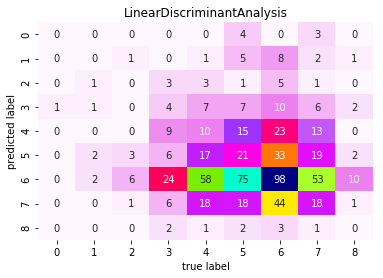

C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.


accuracy, std_accuracy  0.20839363241678727


In [35]:
select_dim = select_col.copy()
print("selected dimensions:", select_dim)
print("--"*50)
#*************************************************************

# remove top three attributes:
rm = [ 'Children', 'Education', 'Dwelling_Type' ]

#*************************************************************
for i in range(len(rm)):
    select_dim.remove(rm[i])
print("remove dimensions:", rm)

print("--"*50)
print("accuracy, std_accuracy ", check_accur(select_dim))

selected dimensions: ['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years', 'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type']
----------------------------------------------------------------------------------------------------
remove dimensions: ['Member_Tenure_Years', 'Children', 'Education']
----------------------------------------------------------------------------------------------------
number of records:  1065
The Accuracy Of  5  Feature Model:
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001) 

LinearDiscriminantAnalysis:
train: 76.05633802816901%
test:  74.65% 

Confusion Matrix LinearDiscriminantAnalysis
[[  0   0   2   0]
 [  0   1   4   3]
 [  2   6 298  38]
 [  1   2  50  19]] 



C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


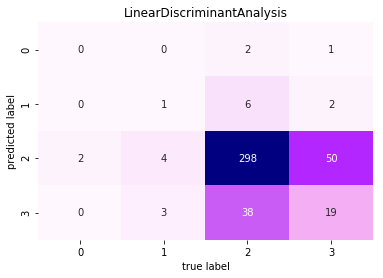

C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.


accuracy, std_accuracy  0.744131455399061


In [36]:
select_dim = select_col.copy()
print("selected dimensions:", select_dim)
print("--"*50)
#*************************************************************

# remove top three attributes:
rm = [ 'Member_Tenure_Years', 'Children', 'Education' ]

#*************************************************************
for i in range(len(rm)):
    select_dim.remove(rm[i])
print("remove dimensions:", rm)

print("--"*50)
print("accuracy, std_accuracy ", check_accur(select_dim))

selected dimensions: ['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years', 'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type']
----------------------------------------------------------------------------------------------------
remove dimensions: ['New_Mover_Flag', 'Children', 'Education']
----------------------------------------------------------------------------------------------------
number of records:  1748
The Accuracy Of  5  Feature Model:
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001) 

LinearDiscriminantAnalysis:
train: 85.7824427480916%
test:  77.71% 

Confusion Matrix LinearDiscriminantAnalysis
[[  1   0   1   0]
 [  0   2   6   4]
 [ 21  17 520  33]
 [  2   2  70  21]] 



C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


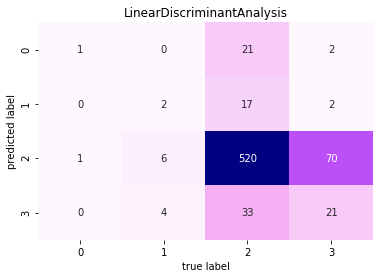

C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.


accuracy, std_accuracy  0.8471428571428572


In [37]:
select_dim = select_col.copy()
print("selected dimensions:", select_dim)
print("--"*50)
#*************************************************************

# remove top three attributes:
rm = [ 'New_Mover_Flag', 'Children', 'Education' ]

#*************************************************************
for i in range(len(rm)):
    select_dim.remove(rm[i])
print("remove dimensions:", rm)

print("--"*50)
print("accuracy, std_accuracy ", check_accur(select_dim))

selected dimensions: ['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years', 'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type']
----------------------------------------------------------------------------------------------------
remove dimensions: ['Children', 'Education']
----------------------------------------------------------------------------------------------------
number of records:  1759
The Accuracy Of  6  Feature Model:
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001) 

LinearDiscriminantAnalysis:
train: 85.49763033175356%
test:  80.26% 

Confusion Matrix LinearDiscriminantAnalysis
[[  0   0   1   0]
 [  0   0  10   1]
 [ 10   9 550  34]
 [  1   3  70  15]] 



C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


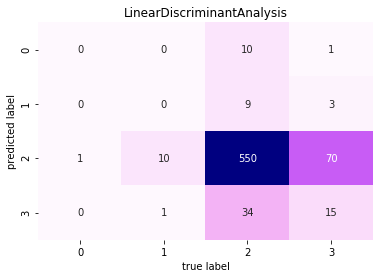

C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.


accuracy, std_accuracy  0.84375


In [38]:
select_dim = select_col.copy()
print("selected dimensions:", select_dim)
print("--"*50)
#*************************************************************

# remove top three attributes:
rm = [ 'Children', 'Education' ]

#*************************************************************
for i in range(len(rm)):
    select_dim.remove(rm[i])
print("remove dimensions:", rm)

print("--"*50)
print("accuracy, std_accuracy ", check_accur(select_dim))

selected dimensions: ['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years', 'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type']
----------------------------------------------------------------------------------------------------
remove dimensions: ['Children', 'Credit_Ranges']
----------------------------------------------------------------------------------------------------
number of records:  1742
The Accuracy Of  6  Feature Model:
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001) 

LinearDiscriminantAnalysis:
train: 86.22009569377991%
test:  81.35% 

Confusion Matrix LinearDiscriminantAnalysis
[[  0   0   1   0]
 [  0   0  12   1]
 [  7   6 550  18]
 [  0   2  83  17]] 



C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


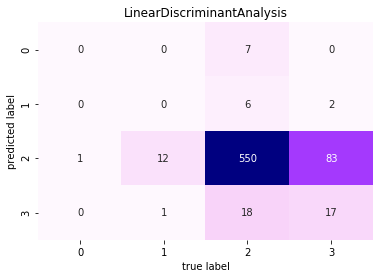

C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.


accuracy, std_accuracy  0.8249641319942611


In [39]:
select_dim = select_col.copy()
print("selected dimensions:", select_dim)
print("--"*50)
#*************************************************************

# remove top three attributes:
rm = [ 'Children', 'Credit_Ranges' ]

#*************************************************************
for i in range(len(rm)):
    select_dim.remove(rm[i])
print("remove dimensions:", rm)

print("--"*50)
print("accuracy, std_accuracy ", check_accur(select_dim))

### Note: big impact on removing the middle 3 attributes:

selected dimensions: ['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years', 'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type']
----------------------------------------------------------------------------------------------------
remove dimensions: ['New_Mover_Flag', 'Member_Tenure_Years', 'Children']
----------------------------------------------------------------------------------------------------
number of records:  1439
The Accuracy Of  5  Feature Model:
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001) 

LinearDiscriminantAnalysis:
train: 81.6917728852839%
test:  79.17% 

Confusion Matrix LinearDiscriminantAnalysis
[[  0   0   0   0]
 [  0   2   3   1]
 [ 11   9 436  16]
 [  1   4  75  18]] 



C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


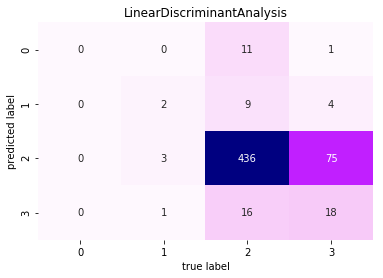

C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.


accuracy, std_accuracy  0.8072916666666666


In [40]:
select_dim = select_col.copy()
print("selected dimensions:", select_dim)
print("--"*50)
#*************************************************************

# remove top three attributes:
rm = [ 'New_Mover_Flag', 'Member_Tenure_Years',  'Children']

#*************************************************************
for i in range(len(rm)):
    select_dim.remove(rm[i])
print("remove dimensions:", rm)

print("--"*50)
print("accuracy, std_accuracy ", check_accur(select_dim))

Rank  0 :  Home_Owner
selected dimensions: ['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years', 'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type']
----------------------------------------------------------------------------------------------------
remove dimensions: Home_Owner
----------------------------------------------------------------------------------------------------
number of records:  1941
The Accuracy Of  7  Feature Model:
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001) 

LinearDiscriminantAnalysis:
train: 84.27835051546391%
test:  81.08% 

Confusion Matrix LinearDiscriminantAnalysis
[[  0   0   1   0]
 [  0   3   5   0]
 [  5  20 620  26]
 [  0   6  84   7]] 



C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


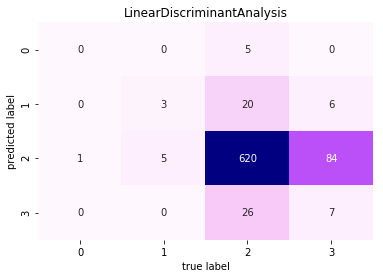

C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.


accuracy, std_accuracy  0.8597168597168597
****************************************************************************************************
Rank  1 :  Age
selected dimensions: ['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years', 'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type']
----------------------------------------------------------------------------------------------------
remove dimensions: Age
----------------------------------------------------------------------------------------------------
number of records:  1561
The Accuracy Of  7  Feature Model:
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001) 

LinearDiscriminantAnalysis:
train: 85.25641025641025%
test:  82.4% 

Confusion Matrix LinearDiscriminantAnalysis
[[  0   0   3   0]
 [  0   2   3   1]
 [  0   9 492  13]
 [  0   3  78  21]] 



C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


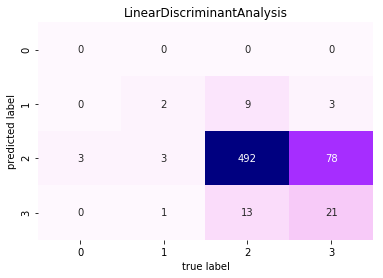

C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.


accuracy, std_accuracy  0.8096
****************************************************************************************************
Rank  2 :  Length_Of_Residence
selected dimensions: ['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years', 'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type']
----------------------------------------------------------------------------------------------------
remove dimensions: Length_Of_Residence
----------------------------------------------------------------------------------------------------
number of records:  1855
The Accuracy Of  7  Feature Model:
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001) 

LinearDiscriminantAnalysis:
train: 84.36657681940702%
test:  78.57% 

Confusion Matrix LinearDiscriminantAnalysis
[[  1   0   2   0]
 [  0   0   8   3]
 [ 17  19 563  27]
 [  3   2  78  19]] 



C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


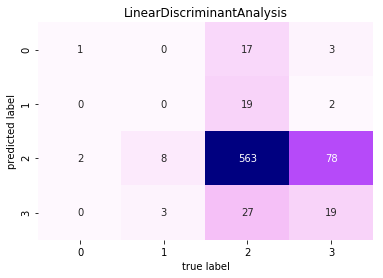

C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.


accuracy, std_accuracy  0.8504043126684636
****************************************************************************************************
Rank  3 :  Member_Tenure_Years
selected dimensions: ['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years', 'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type']
----------------------------------------------------------------------------------------------------
remove dimensions: Member_Tenure_Years
----------------------------------------------------------------------------------------------------
number of records:  1632
The Accuracy Of  7  Feature Model:
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001) 

LinearDiscriminantAnalysis:
train: 84.06537282941777%
test:  81.47% 

Confusion Matrix LinearDiscriminantAnalysis
[[  1   0   0   0]
 [  0   4   5   2]
 [ 20   3 511  15]
 [  2   4  70  16]] 



C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


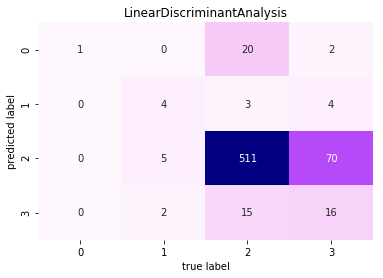

C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.


accuracy, std_accuracy  0.8300153139356815
****************************************************************************************************
Rank  4 :  Children
selected dimensions: ['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years', 'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type']
----------------------------------------------------------------------------------------------------
remove dimensions: Children
----------------------------------------------------------------------------------------------------
number of records:  1904
The Accuracy Of  7  Feature Model:
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001) 

LinearDiscriminantAnalysis:
train: 87.56567425569177%
test:  81.76% 

Confusion Matrix LinearDiscriminantAnalysis
[[  1   0   2   0]
 [  0   1  12   3]
 [  9   6 605  33]
 [  1   1  72  16]] 



C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


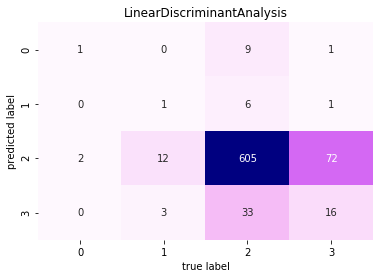

C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.


accuracy, std_accuracy  0.8543307086614174
****************************************************************************************************
Rank  5 :  Credit_Ranges
selected dimensions: ['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years', 'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type']
----------------------------------------------------------------------------------------------------
remove dimensions: Credit_Ranges
----------------------------------------------------------------------------------------------------
number of records:  1839
The Accuracy Of  7  Feature Model:
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001) 

LinearDiscriminantAnalysis:
train: 85.94741613780599%
test:  82.07% 

Confusion Matrix LinearDiscriminantAnalysis
[[  1   0   0   0]
 [  0   0   5   2]
 [ 12  13 587  19]
 [  4   8  69  16]] 



C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


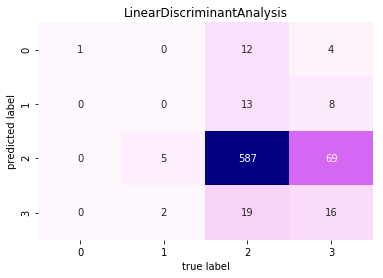

C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.


accuracy, std_accuracy  0.8519021739130435
****************************************************************************************************
Rank  6 :  Dwelling_Type
selected dimensions: ['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years', 'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type']
----------------------------------------------------------------------------------------------------
remove dimensions: Dwelling_Type
----------------------------------------------------------------------------------------------------
number of records:  1934
The Accuracy Of  7  Feature Model:
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001) 

LinearDiscriminantAnalysis:
train: 48.01724137931034%
test:  27.91% 

Confusion Matrix LinearDiscriminantAnalysis
[[16  7 32 43 22]
 [ 0  0  7  6  4]
 [22  2 54 84 42]
 [21  9 61 87 42]
 [24  3 55 72 59]] 



C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


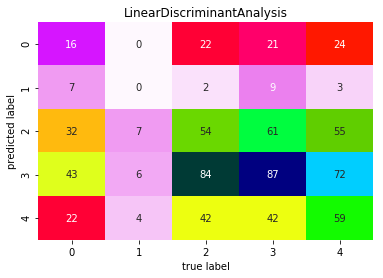

C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.


accuracy, std_accuracy  0.29198966408268734
****************************************************************************************************
Rank  7 :  Education
selected dimensions: ['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years', 'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type']
----------------------------------------------------------------------------------------------------
remove dimensions: Education
----------------------------------------------------------------------------------------------------
number of records:  1844
The Accuracy Of  7  Feature Model:
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001) 

LinearDiscriminantAnalysis:
train: 85.80470162748644%
test:  81.57% 

Confusion Matrix LinearDiscriminantAnalysis
[[  0   0   0   0]
 [  0   2   8   0]
 [ 11   9 584  28]
 [  1   9  70  16]] 



C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


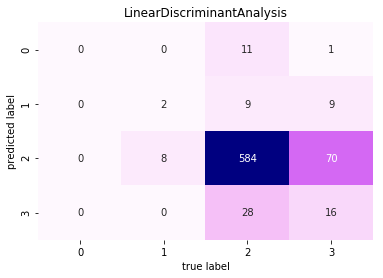

C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.


accuracy, std_accuracy  0.8604336043360433
****************************************************************************************************


In [41]:
sampli = ['Home_Owner', 'Age', 'Length_Of_Residence',
          'Member_Tenure_Years', 'Children', 'Credit_Ranges', 'Dwelling_Type', 'Education']

for i in range(len(sampli)):
    li = sampli[i]
    print("Rank ", i, ": " , li)
    
    select_dim = select_col.copy()
    print("selected dimensions:", select_dim)
    print("--"*50)
    #*************************************************************
    
    rm = np.array(li)
    #print(li)
    #print("--"*50)

    #*************************************************************
    select_dim.remove(rm)
    print("remove dimensions:", rm)

    print("--"*50)
    print("accuracy, std_accuracy ", check_accur(select_dim))
    print("**"*50)


In [42]:
# https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c

#### Plot
https://imagecolorpicker.com/en

RED #C3545D

BLUE #1D5ED2

In [43]:
subdf.columns

Index(['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years',
       'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type',
       '_total_products'],
      dtype='object')

['Home_Owner']
Index(['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years',
       'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type',
       '_total_products'],
      dtype='object')
['Age']
Index(['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years',
       'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type',
       '_total_products'],
      dtype='object')
['Length_Of_Residence']
Index(['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years',
       'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type',
       '_total_products'],
      dtype='object')
['New_Mover_Flag']
Index(['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years',
       'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type',
       '_total_products'],
      dtype='object')
['Member_Tenure_Years']
Index(['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years',
       '

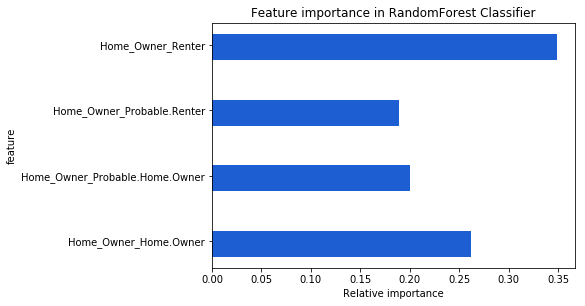

<Figure size 360x360 with 0 Axes>

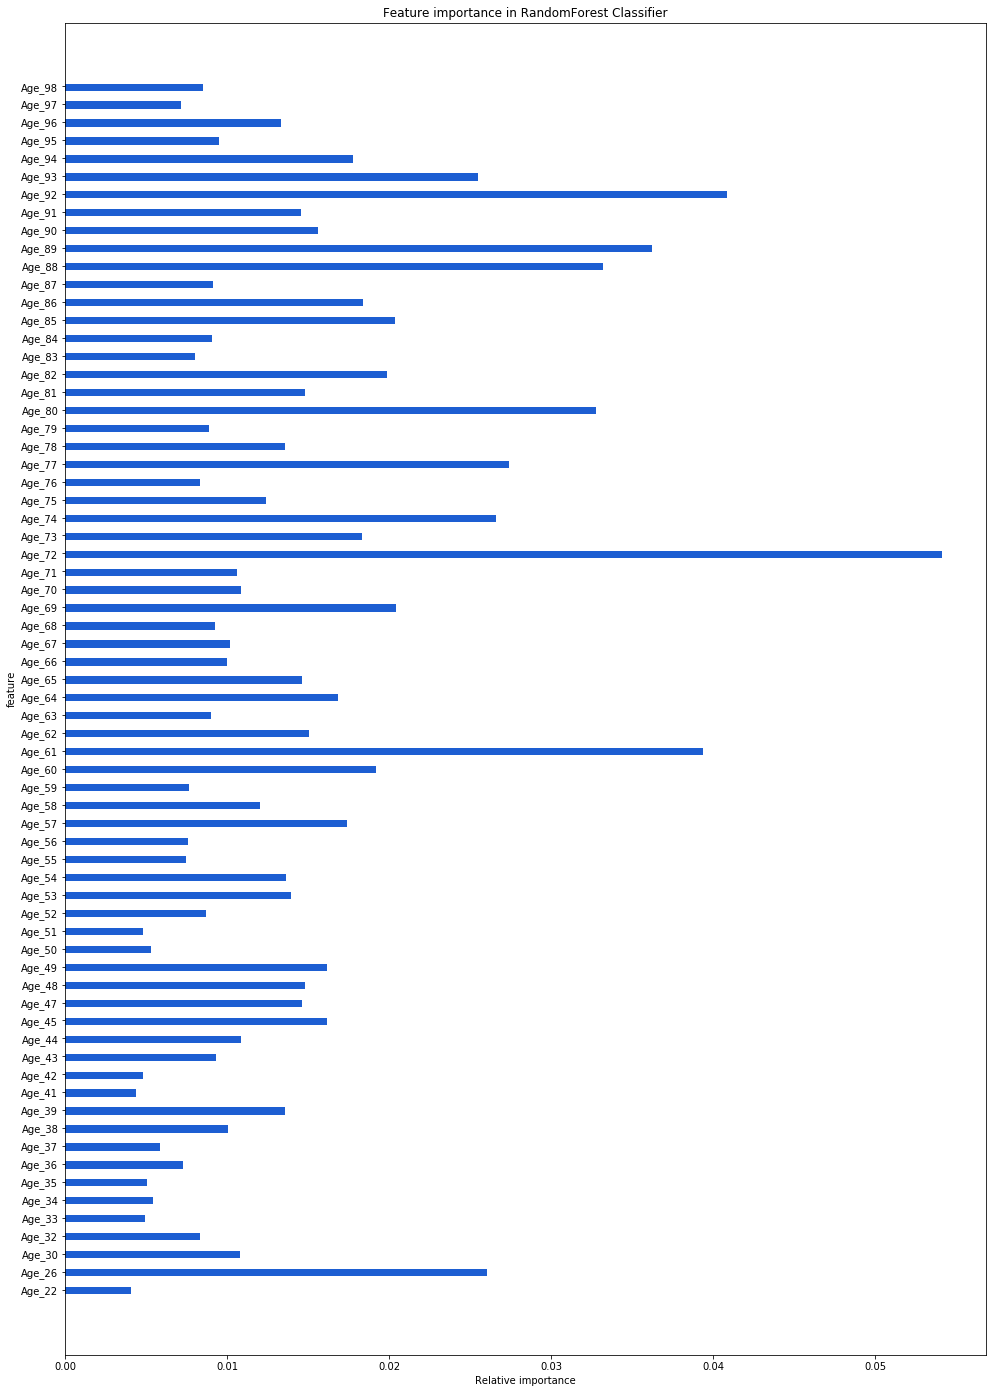

<Figure size 360x360 with 0 Axes>

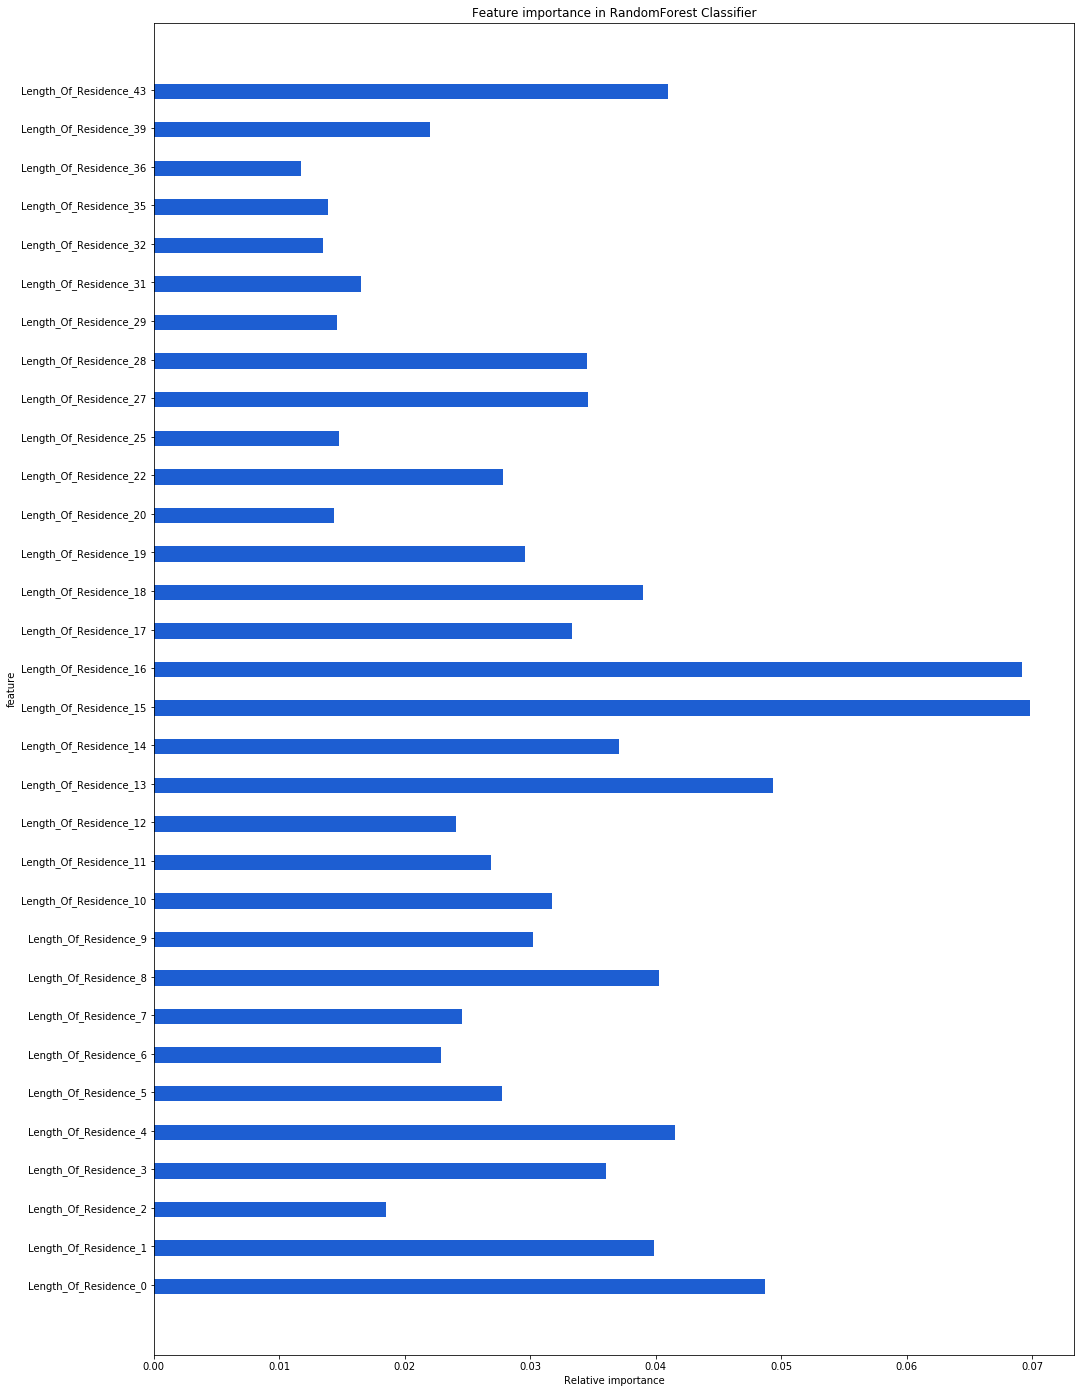

<Figure size 360x360 with 0 Axes>

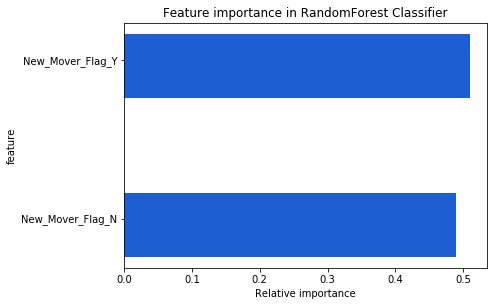

<Figure size 360x360 with 0 Axes>

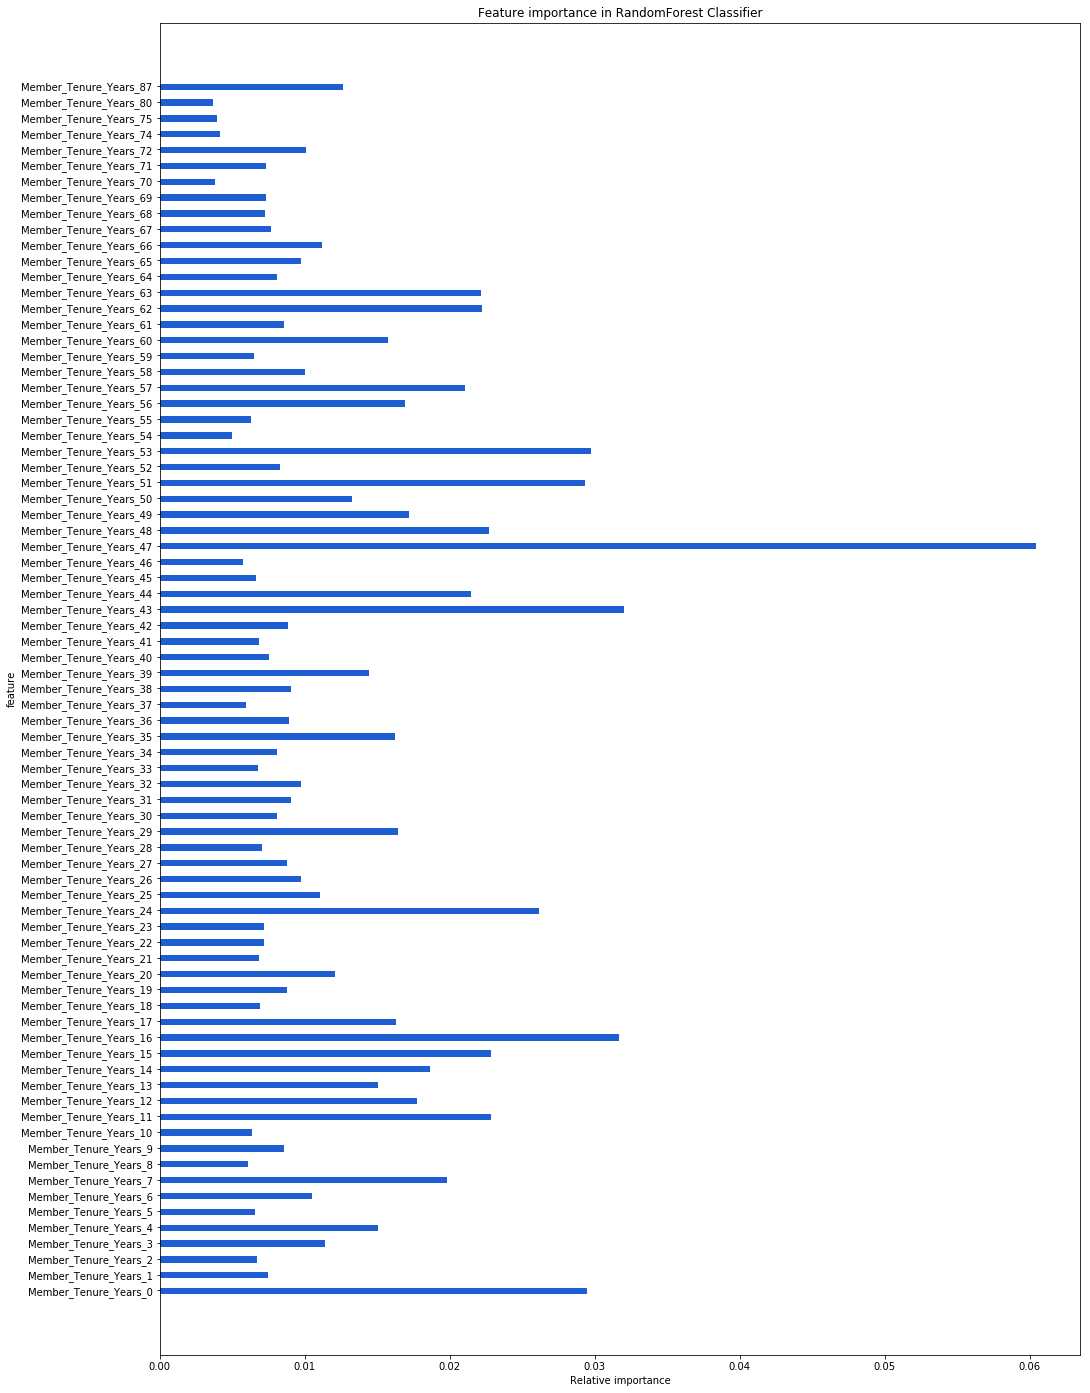

<Figure size 360x360 with 0 Axes>

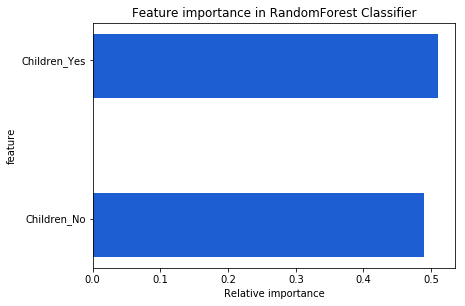

<Figure size 360x360 with 0 Axes>

In [44]:
ckli = [ 'Home_Owner', 'Age', 'Length_Of_Residence', 'New_Mover_Flag', 'Member_Tenure_Years',  'Children']
dfx = subdf.copy()

for i in range(len(ckli)):
    #print(ckli[i])
    
    col = [ckli[i]]
    print(col)
    print(dfx.columns)
    
    df_new = pd.get_dummies(dfx[[ckli[i]]], columns=col)
    y_new = subdf['_total_products'].apply(yes_or_no)
    #print(y_new.unique())
    #print(df_new.shape, " & ", len(y_new))
    
    #print(list(df_new.columns))

    X = df_new.copy()
    y = y_new.copy()

    # Random Forest Classifier
    rf = RandomForestClassifier(random_state=0,n_estimators=100)
    # Train the classifier
    rf.fit(X, y)

    col = list(df_new.columns)
    #modelname.feature_importance_
    y = rf.feature_importances_
    #plot
    
    fig, ax = plt.subplots() 
    width = 0.4 # the width of the bars 
    ind = np.arange(len(y)) # the x locations for the groups
    ax.barh(ind, y, width, color='#1D5ED2')
    ax.set_yticks(ind+width/10)
    ax.set_yticklabels(col, minor=False)
    plt.title('Feature importance in RandomForest Classifier')
    plt.xlabel('Relative importance')
    plt.ylabel('feature') 
    plt.figure(figsize=(5,5))
    
    # Adjust the chart sizes:
    if ckli[i] == 'Age':
        fig.set_size_inches(16.5, 24.5, forward=True)
    elif ckli[i] == 'Length_Of_Residence':
        fig.set_size_inches(16.5, 24.5, forward=True)
    elif ckli[i] == 'Member_Tenure_Years':
        fig.set_size_inches(16.5, 24.5, forward=True)
    else:
        fig.set_size_inches(6.5, 4.5, forward=True)
   


In [45]:
subdf.columns

Index(['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years',
       'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type',
       '_total_products'],
      dtype='object')

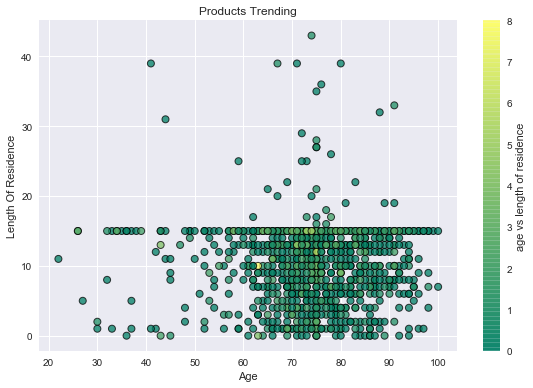

In [46]:
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('seaborn')

li = ['Age','Length_Of_Residence','_total_products']
df1= df_temp[li].copy()
df2 = df1.dropna()
subdf = df2.drop_duplicates()

data = subdf.copy()
age = data['Age']
lor = data['Length_Of_Residence']
tp = data['_total_products']

plt.scatter(age, lor, c=tp, cmap='summer',
            edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('age vs length of residence')

plt.title('Products Trending')
plt.xlabel('Age')
plt.ylabel('Length Of Residence')

plt.tight_layout()

plt.show()


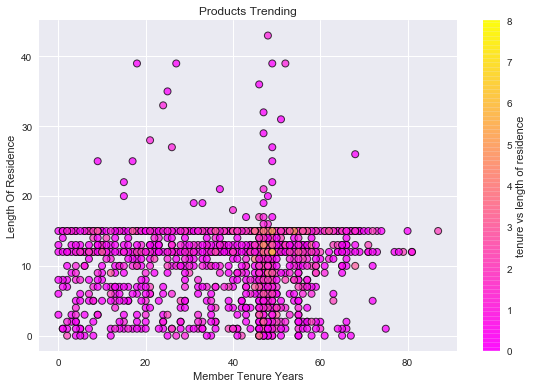

In [47]:
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('seaborn')

li = ['Member_Tenure_Years','Length_Of_Residence','_total_products']
df1= df_temp[li].copy()
df2 = df1.dropna()
subdf = df2.drop_duplicates()

data = subdf.copy()
tenure = data['Member_Tenure_Years']
lor = data['Length_Of_Residence']
tp = data['_total_products']

plt.scatter(tenure, lor, c=tp, cmap='spring',
            edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('tenure vs length of residence')

plt.title('Products Trending')
plt.xlabel('Member Tenure Years')
plt.ylabel('Length Of Residence')

plt.tight_layout()

plt.show()

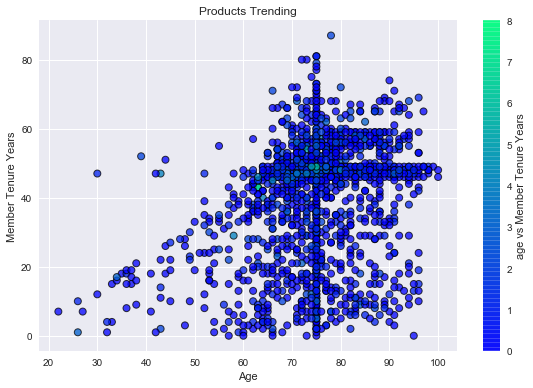

In [48]:
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('seaborn')

li = ['Age','Member_Tenure_Years','_total_products']
df1= df_temp[li].copy()
df2 = df1.dropna()
subdf = df2.drop_duplicates()

data = subdf.copy()
age = data['Age']
tenure = data['Member_Tenure_Years']
tp = data['_total_products']

plt.scatter(age, tenure, c=tp, cmap='winter',
            edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('age vs Member Tenure Years')

plt.title('Products Trending')
plt.xlabel('Age')
plt.ylabel('Member Tenure Years')

plt.tight_layout()

plt.show()

In [49]:
# Most of the members are between 65 to 75 and 
# therefore the products are purchase by this group of people